# Imports

In [ ]:
# file libraries
import os
from pathlib import Path

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Tubes_KDS/BLAST_Result"

/content/drive/MyDrive/Tubes_KDS/BLAST_Result


In [ ]:
# TO ANALYZE (Counts and Organism Data):
# 1. BRU_C1
# 2. BRU_C2
# 3. BR_A1
# 4. BR_A2

current_dir = Path(os.getcwd())
df_bru_a1_count = pd.read_csv("counts_bru_a1.csv")
df_bru_a2_count = pd.read_csv("counts_bru_a2.csv")
df_bru_b_count = pd.read_csv("counts_bru_b.csv")
df_bru_c1_count = pd.read_json("counts_bru_c1.json")
df_bru_c2_count = pd.read_json("counts_bru_c2.json")
df_br_a1_count = pd.read_json("counts_br_a1.json")
df_br_a2_count = pd.read_json("counts_br_a2.json")
df_br_b1_count = pd.read_json("counts_br_b1.json")
df_br_b2_count = pd.read_json("counts_br_b2.json")
df_br_c_count = pd.read_csv("counts_br_c.csv")
df_f_a_count = pd.read_csv("counts_f_a.csv")
df_f_b_count = pd.read_csv("counts_f_b.csv")
df_f_c_count = pd.read_csv("counts_f_c.csv")

df_bru_a1_organism = pd.read_json("organisms_data_bru_a1.json").T.reset_index()
df_bru_a2_organism = pd.read_json("organisms_data_bru_a2.json").T.reset_index()
df_bru_b_organism = pd.read_json("organisms_data_bru_b.json").T.reset_index()
df_bru_c1_organism = pd.read_json("organisms_data_bru_c1.json").T.reset_index()
df_bru_c2_organism = pd.read_json("organisms_data_bru_c2.json").T.reset_index()
df_br_a1_organism = pd.read_json("organisms_data_br_a1.json").T.reset_index()
df_br_a2_organism = pd.read_json("organisms_data_br_a2.json").T.reset_index()
df_br_b1_organism = pd.read_json("organisms_data_br_b1.json").T.reset_index()
df_br_b2_organism = pd.read_json("organisms_data_br_b2.json").T.reset_index()
df_br_c_organism = pd.read_json("organisms_data_br_c.json").T.reset_index()
df_f_a_organism = pd.read_json("organisms_data_f_a.json").T.reset_index()
df_f_b_organism = pd.read_json("organisms_data_f_b.json").T.reset_index()
df_f_c_organism = pd.read_json("organisms_data_f_c.json").T.reset_index()

df_bru_a1_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_bru_a2_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_bru_b_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_bru_c1_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_bru_c2_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_br_a1_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_br_a2_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_br_b1_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_br_b2_organism.columns = ['raw_title', 'title', 'Length', 'E-value']
df_br_c_organism.columns  = ['raw_title', 'title', 'Length', 'E-value']
df_f_a_organism.columns   = ['raw_title', 'title', 'Length', 'E-value']
df_f_b_organism.columns   = ['raw_title', 'title', 'Length', 'E-value']
df_f_c_organism.columns   = ['raw_title', 'title', 'Length', 'E-value']

organism_dfs = [
    df_bru_a1_organism, df_bru_a2_organism, df_bru_b_organism,
    df_bru_c1_organism, df_bru_c2_organism,
    df_br_a1_organism, df_br_a2_organism,
    df_br_b1_organism, df_br_b2_organism, df_br_c_organism,
    df_f_a_organism, df_f_b_organism, df_f_c_organism
]

for df in organism_dfs:
    df['E-value'] = pd.to_numeric(df['E-value'], errors='coerce')

In [ ]:
def merge_organism_and_count(organism_df, count_df):
    """
    Merge organism and count DataFrames by matching 'title' and 'organism',
    then drop 'raw_title' column.
    """
    merged = pd.merge(
        count_df,
        organism_df,
        left_on='organism',
        right_on='title',
        how='inner'  # Use 'inner' to ensure only matched entries
    )
    return merged.drop(columns=['raw_title'])

merged_dfs = {
    "bru_a1": merge_organism_and_count(df_bru_a1_organism, df_bru_a1_count),
    "bru_a2": merge_organism_and_count(df_bru_a2_organism, df_bru_a2_count),
    "bru_b": merge_organism_and_count(df_bru_b_organism, df_bru_b_count),
    "bru_c1": merge_organism_and_count(df_bru_c1_organism, df_bru_c1_count),
    "bru_c2": merge_organism_and_count(df_bru_c2_organism, df_bru_c2_count),
    "br_a1": merge_organism_and_count(df_br_a1_organism, df_br_a1_count),
    "br_a2": merge_organism_and_count(df_br_a2_organism, df_br_a2_count),
    "br_b1": merge_organism_and_count(df_br_b1_organism, df_br_b1_count),
    "br_b2": merge_organism_and_count(df_br_b2_organism, df_br_b2_count),
    "br_c":  merge_organism_and_count(df_br_c_organism,  df_br_c_count),
    "f_a":   merge_organism_and_count(df_f_a_organism,   df_f_a_count),
    "f_b":   merge_organism_and_count(df_f_b_organism,   df_f_b_count),
    "f_c":   merge_organism_and_count(df_f_c_organism,   df_f_c_count),
}

In [ ]:
for name, df in merged_dfs.items():
    unique_taxa = df["organism"].nunique()
    print(f"{name} has {unique_taxa} unique taxa")

bru_a1 has 2475 unique taxa
bru_a2 has 3411 unique taxa
bru_b has 4248 unique taxa
bru_c1 has 4066 unique taxa
bru_c2 has 2309 unique taxa
br_a1 has 3516 unique taxa
br_a2 has 2032 unique taxa
br_b1 has 1785 unique taxa
br_b2 has 1933 unique taxa
br_c has 2011 unique taxa
f_a has 3676 unique taxa
f_b has 2907 unique taxa
f_c has 3023 unique taxa


In [ ]:
bru_df = pd.concat([
    merged_dfs["bru_a1"],
    merged_dfs["bru_a2"],
    merged_dfs["bru_b"],
    merged_dfs["bru_c1"],
    merged_dfs["bru_c2"]
], keys=["bru_a1", "bru_a2", "bru_b", "bru_c1", "bru_c2"], names=["sample"])

br_df = pd.concat([
    merged_dfs["br_a1"],
    merged_dfs["br_a2"],
    merged_dfs["br_b1"],
    merged_dfs["br_b2"],
    merged_dfs["br_c"]
], keys=["br_a1", "br_a2", "br_b1", "br_b2", "br_c"], names=["sample"])

f_df = pd.concat([
    merged_dfs["f_a"],
    merged_dfs["f_b"],
    merged_dfs["f_c"]
], keys=["f_a", "f_b", "f_c"], names=["sample"])

In [ ]:
bru_unique_taxa = bru_df["organism"].nunique()
print(f"bru has {bru_unique_taxa} unique taxa")

br_unique_taxa = br_df["organism"].nunique()
print(f"br has {br_unique_taxa} unique taxa")

f_unique_taxa = f_df["organism"].nunique()
print(f"f has {f_unique_taxa} unique taxa")

bru has 4537 unique taxa
br has 5265 unique taxa
f has 5332 unique taxa


In [ ]:
df_rice_count = pd.read_json("rice_paddy_counts.json")
df_rice_organisms = pd.read_json("organisms_rice_data.json").T.reset_index()

df_rice_organisms.columns = ['raw_title', 'title', 'Length', 'E-value']
df['E-value'] = pd.to_numeric(df_rice_organisms['E-value'], errors='coerce')

df_rice = merge_organism_and_count(df_rice_organisms, df_rice_count)

In [ ]:
df_brassica_count = pd.read_json("brassica_counts.json")
df_brassica_organisms = pd.read_json("organisms_brassica_data.json").T.reset_index()

df_brassica_organisms.columns = ['raw_title', 'title', 'Length', 'E-value']
df['E-value'] = pd.to_numeric(df_brassica_organisms['E-value'], errors='coerce')

df_brassica = merge_organism_and_count(df_brassica_organisms, df_brassica_count)

In [ ]:
df_bean_count = pd.read_json("bean_counts.json")
df_bean_organisms = pd.read_json("organisms_bean_data.json").T.reset_index()

df_bean_organisms.columns = ['raw_title', 'title', 'Length', 'E-value']
df['E-value'] = pd.to_numeric(df_bean_organisms['E-value'], errors='coerce')

df_bean = merge_organism_and_count(df_bean_organisms, df_rice_count)

In [ ]:
# SIMPLIFY NAMES
import re

def simplify_name(full_title):
    """
    Extract genus + species from BLAST title or organism string.
    """
    # Remove pipe-separated prefix like 'gi|...|ref|...|'
    if '|' in full_title:
        full_title = full_title.split('|')[-1].strip()

    # Extract the first two words: Genus + species
    match = re.match(r'([A-Z][a-z]+ [a-z]+)', full_title)
    return match.group(1) if match else full_title

bru_df['organism'] = bru_df['organism'].apply(simplify_name)
br_df['organism'] = br_df['organism'].apply(simplify_name)
f_df['organism'] = f_df['organism'].apply(simplify_name)
df_rice['organism'] = df_rice['organism'].apply(simplify_name)
df_brassica['organism'] = df_brassica['organism'].apply(simplify_name)
df_bean["organism"] = df_bean['organism'].apply(simplify_name)

In [ ]:
bru_unique_taxa = bru_df["organism"].nunique()
print(f"bru has {bru_unique_taxa} unique taxa")

br_unique_taxa = br_df["organism"].nunique()
print(f"br has {br_unique_taxa} unique taxa")

f_unique_taxa = f_df["organism"].nunique()
print(f"f has {f_unique_taxa} unique taxa")

bru has 4108 unique taxa
br has 4722 unique taxa
f has 4869 unique taxa


In [ ]:
bru_df["genus"] = bru_df["organism"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "Unknown")
br_df["genus"] = br_df["organism"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "Unknown")
f_df["genus"] = f_df["organism"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "Unknown")
df_rice["genus"] = df_rice["organism"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "Unknown")
df_brassica["genus"] = df_brassica["organism"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "Unknown")
df_bean["genus"] = df_bean["organism"].apply(lambda x: x.split()[0] if isinstance(x, str) and len(x.split()) > 0 else "Unknown")

In [ ]:
dfs = {
    "bru": bru_df,
    "br": br_df,
    "f": f_df,
    "rice": df_rice,
    "brassica": df_brassica,
    "bean": df_bean
}

In [ ]:
for name, df in dfs.items():
    print(f"{name} information:")
    print(df.columns)
    print(df.shape)

bru information:
Index(['organism', 'count', 'title', 'Length', 'E-value', 'genus'], dtype='object')
(16509, 6)
br information:
Index(['organism', 'count', 'title', 'Length', 'E-value', 'genus'], dtype='object')
(11277, 6)
f information:
Index(['organism', 'count', 'title', 'Length', 'E-value', 'genus'], dtype='object')
(9606, 6)
rice information:
Index(['organism', 'count', 'title', 'Length', 'E-value', 'genus'], dtype='object')
(3229, 6)
brassica information:
Index(['organism', 'count', 'title', 'Length', 'E-value', 'genus'], dtype='object')
(45, 6)
bean information:
Index(['organism', 'count', 'title', 'Length', 'E-value', 'genus'], dtype='object')
(1375, 6)


In [ ]:
for name in ["br", "f"]:
    print(dfs[name].groupby("organism")["count"].sum().sort_values(ascending=False).head(10))
    print(f"{name} top genus counts:")
    print(dfs[name].groupby("genus")["count"].sum().sort_values(ascending=False).head(10))
    print(dfs[name]["count"].sum(), "total count")
    print()
dfs[name]['organism'].head()

organism
Hydrocarboniphaga daqingensis     4658
Stenotrophobium rhamnosiphilum    3918
Panacagrimonas perspica           3244
Ralstonia pickettii               2607
Methylotenera mobilis             2505
Thermus thermophilus              2278
Undibacterium terreum             2241
Massilia arenae                   1609
Methylobacillus flagellatus       1556
Undibacterium rivi                1545
Name: count, dtype: int64
br top genus counts:
genus
Undibacterium        7658
Hydrocarboniphaga    4710
Methylotenera        3995
Stenotrophobium      3918
Thermus              3514
Brevundimonas        3343
Panacagrimonas       3244
Ralstonia            2928
Massilia             2663
Novosphingobium      2580
Name: count, dtype: int64
143960 total count

organism
Alloacidobacterium dinghuense        2300
Bryocella elongata                   1567
Paracidobacterium acidisoli          1402
Arenimicrobium luteum                1182
Brevitalea deliciosa                 1181
Brevitalea aridisoli   

sample   
f_a     0    Alloacidobacterium dinghuense
        1             Brevitalea aridisoli
        2            Arenimicrobium luteum
        3             Brevitalea deliciosa
        4      Paracidobacterium acidisoli
Name: organism, dtype: object

In [ ]:
genus_tables = {}
for name, df in dfs.items():
    grouped = df.groupby("genus")["count"].sum()
    genus_tables[name] = grouped

genus_matrix = pd.DataFrame(genus_tables).fillna(0).astype(int)

In [ ]:
print(genus_matrix["bru"].value_counts())
print(genus_matrix["br"].value_counts())
print(genus_matrix["f"].value_counts())

bru
0      1069
4       206
2       135
8        75
1        68
       ... 
930       1
806       1
900       1
113       1
257       1
Name: count, Length: 337, dtype: int64
br
0       950
1       359
2       180
3       147
4        76
       ... 
1912      1
459       1
572       1
2227      1
386       1
Name: count, Length: 272, dtype: int64
f
0       754
1       361
2       218
3       145
4       100
       ... 
89        1
349       1
1110      1
524       1
1101      1
Name: count, Length: 242, dtype: int64


In [ ]:
!pip install scikit-bio

In [ ]:
from skbio.diversity.alpha import shannon, simpson

# Transpose: rows = samples, columns = genus
genus_matrix_T = genus_matrix.T

# Alpha diversity
genus_matrix_T["shannon"] = genus_matrix_T.apply(shannon, axis=1)
genus_matrix_T["simpson"] = genus_matrix_T.apply(simpson, axis=1)

# Display results
print(genus_matrix_T[["shannon", "simpson"]])

genus      shannon   simpson
bru       5.452925  0.989495
br        5.355118  0.988114
f         5.892828  0.993527
rice      6.085386  0.995018
brassica  2.319250  0.832300
bean      5.525852  0.992002


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skbio.diversity.alpha import shannon, simpson
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova

sample_level_genus = {}

for name, df in merged_dfs.items():
    df["organism"] = df["organism"].apply(simplify_name)
    df["count"] = pd.to_numeric(df["count"], errors="coerce").fillna(0)
    genus_sum = df.groupby("organism")["count"].sum()
    sample_level_genus[name] = genus_sum

sample_level_genus["rice"] = dfs["rice"].groupby("organism")["count"].sum()
sample_level_genus["brassica"] = dfs["brassica"].groupby("organism")["count"].sum()
sample_level_genus["bean"] = dfs["bean"].groupby("organism")["count"].sum()

sample_matrix = pd.DataFrame(sample_level_genus).fillna(0).T

sample_to_group = {
    "bru_a1": "bru", "bru_a2": "bru", "bru_b": "bru", "bru_c1": "bru", "bru_c2": "bru",
    "br_a1": "br", "br_a2": "br", "br_b1": "br", "br_b2": "br", "br_c": "br",
    "f_a": "f", "f_b": "f", "f_c": "f",
    "rice": "rice",
    "brassica": "brassica",
    "bean": "bean"
}
metadata = pd.Series(sample_to_group)

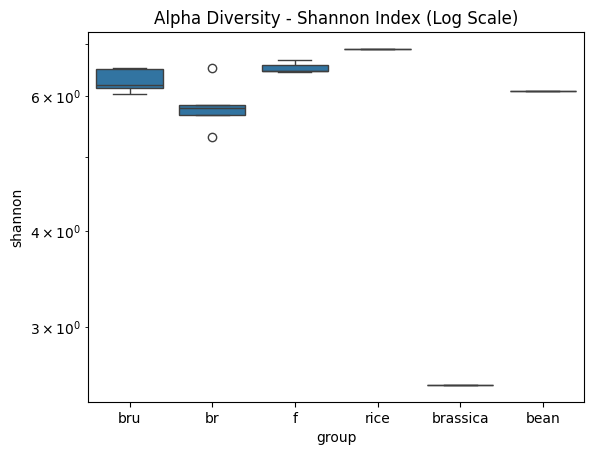

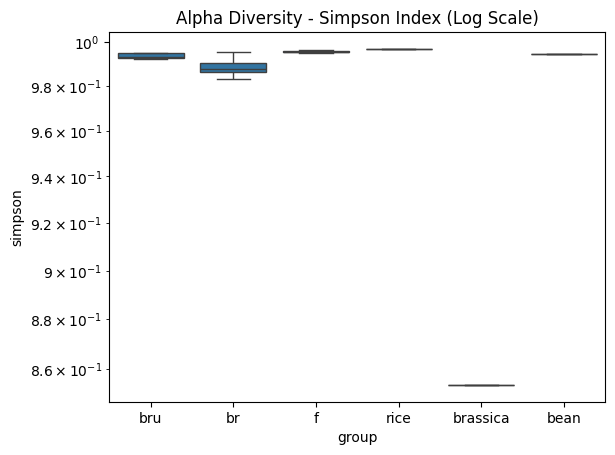

In [ ]:
alpha_df = sample_matrix.copy()
alpha_df["shannon"] = alpha_df.apply(shannon, axis=1)
alpha_df["simpson"] = alpha_df.apply(simpson, axis=1)
alpha_df["group"] = metadata.loc[alpha_df.index]

# Plot Shannon
sns.boxplot(data=alpha_df, x="group", y="shannon")
plt.yscale("log")
plt.title("Alpha Diversity - Shannon Index (Log Scale)")
plt.show()

# Simpson
sns.boxplot(data=alpha_df, x="group", y="simpson")
plt.yscale("log")
plt.title("Alpha Diversity - Simpson Index (Log Scale)")
plt.show()

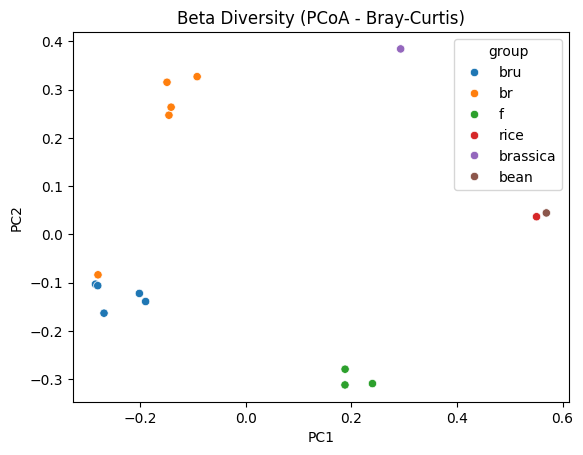

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      16
number of groups                  6
test statistic             4.833604
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


In [ ]:
bc_dm = beta_diversity("braycurtis", sample_matrix.values, ids=sample_matrix.index)

# PCoA
pcoa_df = pcoa(bc_dm).samples.copy()
pcoa_df["group"] = metadata.loc[pcoa_df.index]

sns.scatterplot(data=pcoa_df, x="PC1", y="PC2", hue="group")
plt.title("Beta Diversity (PCoA - Bray-Curtis)")
plt.show()

# PERMANOVA
grouping_vector = [sample_to_group[sample] for sample in bc_dm.ids]
result = permanova(distance_matrix=bc_dm, grouping=grouping_vector)
print(result)

In [ ]:
# Step 1: Build abundance matrix (genus vs. sample)
abundance_matrix = pd.DataFrame()

for key, df in dfs.items():
    counts_by_genus = df.groupby("genus")["count"].sum()
    abundance_matrix[key] = counts_by_genus

# Step 2: Fill missing values (e.g., some genera absent in some samples)
abundance_matrix = abundance_matrix.fillna(0)

In [ ]:
pearson_corr = abundance_matrix.corr(method="pearson")
spearman_corr = abundance_matrix.corr(method="spearman")

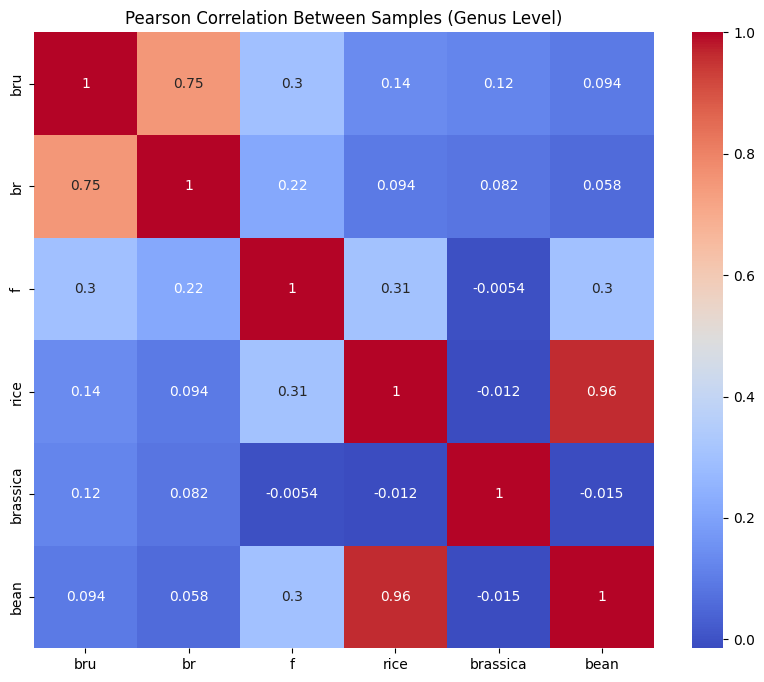

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Between Samples (Genus Level)")
plt.show()

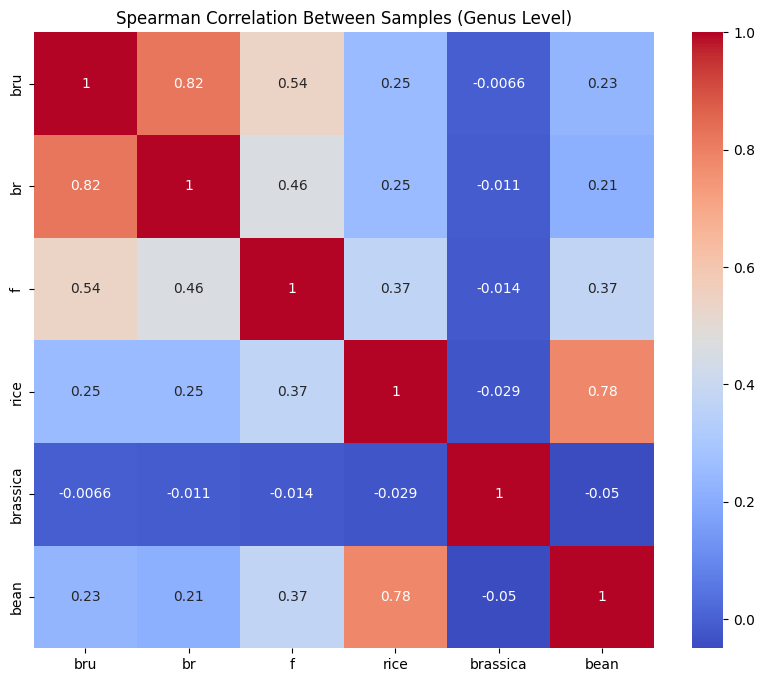

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Between Samples (Genus Level)")
plt.show()